Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7036 - accuracy: 0.4160 - val_loss: 0.7752 - val_accuracy: 0.7280
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8260 - accuracy: 0.7355 - val_loss: 0.4080 - val_accuracy: 0.8820
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5368 - accuracy: 0.8360 - val_loss: 0.3179 - val_accuracy: 0.8980
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4102 - accuracy: 0.8810 - val_loss: 0.2830 - val_accuracy: 0.9120
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.9140 - val_loss: 0.2285 - val_accuracy: 0.9340
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2442 - accuracy: 0.9275 - val_loss: 0.1882 - val_accuracy: 0.9480
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2032 - accu

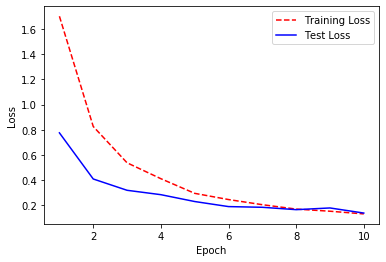

final test accuracy [0.13666166388988496, 0.9639999866485596]


In [74]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

# Load data(do not change)
data = pd.read_csv("src/mnist_train.csv")
train_data = data[:2000]
test_data = data[2000:2500]

# ----- Prepare Data ----- #
batch_size = 128
num_classes = 10
epochs = 10
# input image dimensions
img_rows, img_cols = 28, 28
# preparing your data including data normalization
x_train = np.array(train_data.iloc[:,1:])
y_train = np.array(train_data['label'])
x_test = np.array(test_data.iloc[:,1:])
y_test = np.array(test_data['label'])
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# ----- Build CNN Network ----- #
# Define your model here
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# ----- Define your loss function, optimizer and metrics ----- #
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# ----- Complete PlotLearningCurve function ----- #
def PlotLearningCurve(epoch, trainingloss, testingloss):
    plt.plot(epoch, trainingloss, 'r--')
    plt.plot(epoch, testingloss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();

# fit your model by using training data and get predict label
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# plot learning curve
trainingloss = history.history['loss']
testingloss = history.history['val_loss']
epoch = range(1, len(trainingloss) + 1)
PlotLearningCurve(epoch, trainingloss, testingloss)

# evaluation your model by using testing data
score = model.evaluate(x_test, y_test, verbose=0)
print("final test accuracy", score)
